In [481]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [482]:
data= pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
test=pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [483]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [484]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


#missing categorical variables - Gender,Married,Dependents,Self_Employed
#missing continous variables - LoanAmount,Loan_Amount_Term,Credit_History

In [485]:
data.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [486]:
data.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [487]:
data.Credit_History.unique()

array([  1.,   0.,  nan])

In [488]:
data.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [489]:
data[data.Married.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [490]:
x = data[data["Education"]=="Graduate"]

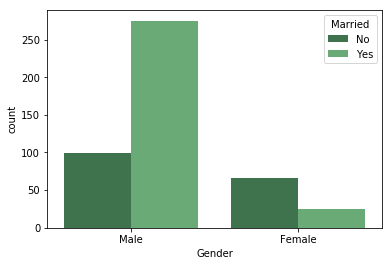

In [491]:
sns.countplot(x="Gender",data=x,palette="Greens_d",hue="Married")
plt.show()

In [492]:
data.loc[(data["Gender"]=="Female")&(data["Education"]=="Graduate"),"Married"]=data.loc[(data["Gender"]=="Female")&(data["Education"]=="Graduate"),"Married"].fillna("No")
data.loc[(data["Gender"]=="Male")&(data["Education"]=="Graduate"),"Married"]=data.loc[(data["Gender"]=="Male")&(data["Education"]=="Graduate"),"Married"].fillna("Yes")

In [493]:
data["Gender"]=data.Gender.fillna("Male")

In [494]:
data.Loan_Amount_Term=data.Loan_Amount_Term.fillna(360.0).astype("float64")

In [495]:
data[data.Dependents.isnull()]


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,Yes,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,Yes,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,360.0,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [496]:
data.Dependents.isnull().sum()

15

In [497]:
data["Dependents"]=data["Dependents"].fillna("0")

In [498]:
data["Self_Employed"]=data["Self_Employed"].fillna("No")

In [499]:
data.LoanAmount.describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [500]:
a =data[(data["Married"]=="Yes")&(data["Gender"]=="Male")&(data["Education"]=="Graduate")&(data["Self_Employed"]=="No")]
b = data[(data["Married"]=="No")&(data["Gender"]=="Male")&(data["Education"]=="Graduate")&(data["Self_Employed"]=="No")]
c = data[(data["Married"]=="No")&(data["Gender"]=="Female")&(data["Education"]=="Graduate")&(data["Self_Employed"]=="No")]
d = data[(data["Married"]=="Yes")&(data["Gender"]=="Male")&(data["Education"]=="Not Graduate")&(data["Self_Employed"]=="No")]
e = data[(data["Married"]=="No")&(data["Gender"]=="Male")&(data["Education"]=="Not Graduate")&(data["Self_Employed"]=="No")]
f =data[(data["Married"]=="No")&(data["Gender"]=="Female")&(data["Education"]=="Not Graduate")&(data["Self_Employed"]=="No")]
g =data[(data["Married"]=="Yes")&(data["Gender"]=="Male")&(data["Education"]=="Graduate")&(data["Self_Employed"]=="Yes")]
h =data[(data["Married"]=="No")&(data["Gender"]=="Female")&(data["Education"]=="Graduate")&(data["Self_Employed"]=="Yes")]

In [501]:
data.loc[(data["Married"]=="Yes")&(data["Gender"]=="Male")&(data["Education"]=="Graduate")&(data["Self_Employed"]=="No"),"LoanAmount"]=data.loc[(data["Married"]=="Yes")&(data["Gender"]=="Male")&(data["Education"]=="Graduate")&(data["Self_Employed"]=="No"),"LoanAmount"].fillna(162.29)
data.loc[(data["Married"]=="No")&(data["Gender"]=="Male")&(data["Education"]=="Graduate")&(data["Self_Employed"]=="No"),"LoanAmount"]=data.loc[(data["Married"]=="No")&(data["Gender"]=="Male")&(data["Education"]=="Graduate")&(data["Self_Employed"]=="No"),"LoanAmount"].fillna(139.56)
data.loc[(data["Married"]=="No")&(data["Gender"]=="Female")&(data["Education"]=="Graduate")&(data["Self_Employed"]=="No"),"LoanAmount"]=data.loc[(data["Married"]=="No")&(data["Gender"]=="Female")&(data["Education"]=="Graduate")&(data["Self_Employed"]=="No"),"LoanAmount"].fillna(117.72)
data.loc[(data["Married"]=="Yes")&(data["Gender"]=="Male")&(data["Education"]=="Not Graduate")&(data["Self_Employed"]=="No"),"LoanAmount"]=data.loc[(data["Married"]=="Yes")&(data["Gender"]=="Male")&(data["Education"]=="Not Graduate")&(data["Self_Employed"]=="No"),"LoanAmount"].fillna(124.87)
data.loc[(data["Married"]=="No")&(data["Gender"]=="Male")&(data["Education"]=="Not Graduate")&(data["Self_Employed"]=="No"),"LoanAmount"]=data.loc[(data["Married"]=="No")&(data["Gender"]=="Male")&(data["Education"]=="Not Graduate")&(data["Self_Employed"]=="No"),"LoanAmount"].fillna(98.46)
data.loc[(data["Married"]=="No")&(data["Gender"]=="Female")&(data["Education"]=="Not Graduate")&(data["Self_Employed"]=="No"),"LoanAmount"]=data.loc[(data["Married"]=="No")&(data["Gender"]=="Female")&(data["Education"]=="Not Graduate")&(data["Self_Employed"]=="No"),"LoanAmount"].fillna(97.1)
data.loc[(data["Married"]=="Yes")&(data["Gender"]=="Male")&(data["Education"]=="Graduate")&(data["Self_Employed"]=="Yes"),"LoanAmount"]=data.loc[(data["Married"]=="Yes")&(data["Gender"]=="Male")&(data["Education"]=="Graduate")&(data["Self_Employed"]=="Yes"),"LoanAmount"].fillna(178.87)
data.loc[(data["Married"]=="No")&(data["Gender"]=="Female")&(data["Education"]=="Graduate")&(data["Self_Employed"]=="Yes"),"LoanAmount"]=data.loc[(data["Married"]=="No")&(data["Gender"]=="Female")&(data["Education"]=="Graduate")&(data["Self_Employed"]=="Yes"),"LoanAmount"].fillna(120.85)

In [502]:
test["Gender"]=test["Gender"].fillna("Male")
test["Dependents"]=test["Dependents"].fillna("0")
test["Self_Employed"]=test["Self_Employed"].fillna("No")
test["Loan_Amount_Term"]=test["Loan_Amount_Term"].fillna(360)

In [503]:
a1=test[(test["Gender"]=="Male")&(test["Education"]=="Graduate")&(test["Married"]=="Yes")&(test["Self_Employed"]=="No")]
b1=test[(test["Gender"]=="Female")&(test["Education"]=="Graduate")&(test["Married"]=="Yes")&(test["Self_Employed"]=="No")]
c1=test[(test["Gender"]=="Male")&(test["Education"]=="Not Graduate")&(test["Married"]=="Yes")&(test["Self_Employed"]=="No")]

In [504]:
test.loc[(test["Gender"]=="Male")&(test["Education"]=="Graduate")&(test["Married"]=="Yes")&(test["Self_Employed"]=="No"),"LoanAmount"]=test.loc[(test["Gender"]=="Male")&(test["Education"]=="Graduate")&(test["Married"]=="Yes")&(test["Self_Employed"]=="No"),"LoanAmount"].fillna(151.43)
test.loc[(test["Gender"]=="Female")&(test["Education"]=="Graduate")&(test["Married"]=="Yes")&(test["Self_Employed"]=="No"),"LoanAmount"]=test.loc[(test["Gender"]=="Female")&(test["Education"]=="Graduate")&(test["Married"]=="Yes")&(test["Self_Employed"]=="No"),"LoanAmount"].fillna(140.75)
test.loc[(test["Gender"]=="Male")&(test["Education"]=="Not Graduate")&(test["Married"]=="Yes")&(test["Self_Employed"]=="No"),"LoanAmount"]=test.loc[(test["Gender"]=="Male")&(test["Education"]=="Not Graduate")&(test["Married"]=="Yes")&(test["Self_Employed"]=="No"),"LoanAmount"].fillna(122.37)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000003C8A00C978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000003C86E8B588>]], dtype=object)

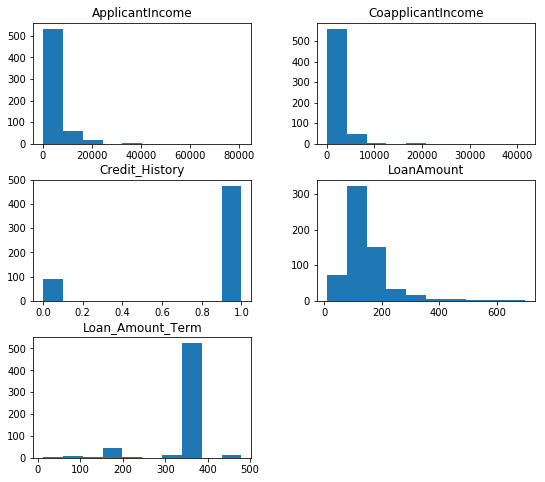

In [505]:
data.hist(bins=10,figsize=(9,8),grid=False)

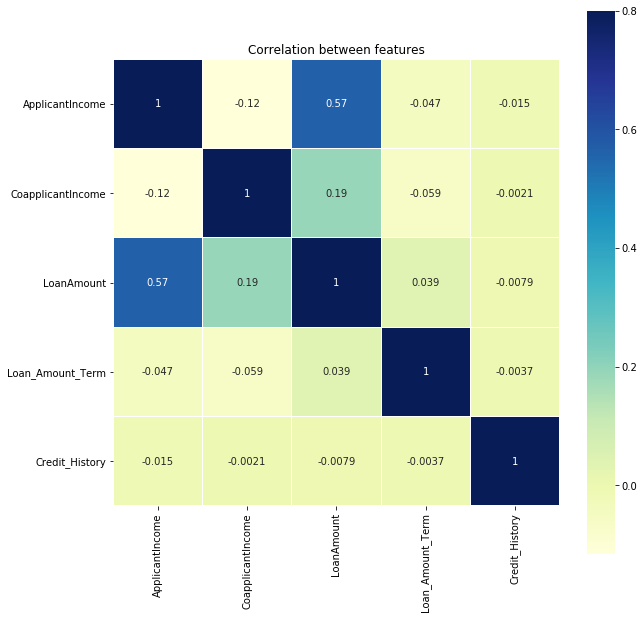

In [506]:
corr=data.corr()
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

#loan amount and applicant income have high positive correlation

In [507]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [508]:
data["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [509]:
data.Credit_History=data["Credit_History"].fillna(1.0)
test.Credit_History=test["Credit_History"].fillna(1.0)

In [510]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [511]:
data["Gender"]=data["Gender"].astype("category")
data["Married"]=data["Married"].astype("category")
data["Dependents"]=data["Dependents"].astype("category")
data["Education"]=data["Education"].astype("category")
data["Self_Employed"]=data["Self_Employed"].astype("category")
data["Property_Area"]=data["Property_Area"].astype("category")

In [512]:
test["Gender"]=test["Gender"].astype("category")
test["Married"]=test["Married"].astype("category")
test["Dependents"]=test["Dependents"].astype("category")
test["Education"]=test["Education"].astype("category")
test["Self_Employed"]=test["Self_Employed"].astype("category")
test["Property_Area"]=test["Property_Area"].astype("category")

In [513]:
y=data["Loan_Status"]

In [514]:
X=data.drop(["Loan_ID","ApplicantIncome","Loan_Status"],axis=1)

In [515]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,0.0,139.56,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,1508.0,128.00,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,0.0,66.00,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2358.0,120.00,360.0,1.0,Urban
4,Male,No,0,Graduate,No,0.0,141.00,360.0,1.0,Urban


In [516]:
categorical_col=["Gender","Married","Dependents","Education","Self_Employed","Property_Area"]
X=pd.get_dummies(X,prefix="category_",columns=categorical_col)

In [517]:
test_ID=test.Loan_ID
test=test.drop(["Loan_ID","ApplicantIncome"],axis=1)
categorical_col=["Gender","Married","Dependents","Education","Self_Employed","Property_Area"]
test=pd.get_dummies(test,prefix="category_",columns=categorical_col)

In [518]:
train_X,val_X,train_y,val_y=train_test_split(X,y,test_size=0.3,random_state=0)

In [519]:
lr=LogisticRegression()
lr.fit(train_X,train_y)
preds=lr.predict(val_X)

In [520]:
metrics.accuracy_score(val_y,preds)

0.83243243243243248

In [521]:
Kfold = model_selection.KFold(n_splits=10,random_state=7)
scoring="accuracy"
modelcv= LogisticRegression()
results = model_selection.cross_val_score(modelcv,train_X,train_y,scoring=scoring,cv=Kfold)

In [522]:
results.mean()

0.80182724252491688

In [526]:
predictions_1=lr.predict(test)
predictions_2=lr.predict_proba(test)

In [525]:
my_submission = pd.DataFrame({"Loan_ID":test_ID,"Loan_Status":predictions_1})
my_submission.to_csv("submission1.csv",index=False)
                              

In [530]:
s11 = pd.DataFrame({"Loan_ID":test_ID,"Loan_Status":predictions_1,"0":predictions_2[:,0],"1":predictions_2[:,1]})
s11.to_csv("probs1.csv",index=False)